# Model Comparisons in Category Learning
## Background
* People learn cateories by recognizing category labels and relevant features (e.g., physical features and functions)
* Many cognitive developmentalists are interested in the role of label in learning category membership, specifically, whether labels function as regular features or specially as a category marker
* This project aims to capture the role of category label in binary category learning. Two models, Bayesian Model and Similarity Model, were employed based on the mainstream theories in cognitive sciences. Under each model, features are probabilistically associated with category membership. Two conditions were considered in each model, where the category labels are either deterministically (p=1) or probabilistically (p<1) associated with category membership.

## Goals
1. Compare the performances of the Bayesian Model and the Similarity Model in category learning
2. Compare the effects of deterministic vs. probabilistic labels on category learning for both the Bayesian Model and the Similarity Model

## Roadmap of Method

<img src="Roadmap_Model_Comparison.png">

## Set Up and Initialize Variables

In [1]:
# Setting up
%pylab inline
from scipy import stats
rcParams['font.size'] = 12;
rcParams['lines.linewidth'] = 1.5;

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialize possible probabilities of features for generating observations
nr_ps = 100 
possible_ps = linspace(0,1,nr_ps); 

# Initialize priors for Bayesian updating
prior_init = stats.beta.pdf(possible_ps,0.5,0.5)/nr_ps; 
prior_init = prior_init.clip(1e-10,1-1e-10)

In [1]:
# User-defined numbers of training trials, features, and testing trials, and probabilities for labels and other features
# For binary categorization, we consider Category A and Category B
nr_trials = 20;
nr_features = 6; 
p_reg_feature_a = 0.9; 
p_reg_feature_b = 0.1;

p_label_a_deterministic = 1.0;
p_label_b_deterministic = 0.0;
p_label_a_probabilistic = 0.7;
p_label_b_probabilistic = 0.3;

test_trials = 100;

## Create the Observation Generator and Generate Learning Observations

In [4]:
# This generator produces stimuli with features probabilistically associated with category membership
# It is used for generating both learning and testing datasets

def obs_generator(nr_trials,nr_features,p_reg_feature,p_label):
    observations = zeros((nr_trials,nr_features));
    for i in range(nr_trials):
        for j in range(nr_features):
            
            # Label is considered the first feature
            if j==0:
                observations[i][j]=stats.binom.rvs(1,p_label); 
            else:
                observations[i][j]=stats.binom.rvs(1,p_reg_feature);
                
    return observations

In [5]:
# Creating training stimuli for Category A and Category B 
# Both conditions, deterministic label and probabilistic label, were considered

obs_sample_a_determinstic = obs_generator(nr_trials,nr_features,p_reg_feature_a,p_label_a_deterministic);
obs_sample_b_determinstic = obs_generator(nr_trials,nr_features,p_reg_feature_b,p_label_b_deterministic);

obs_sample_a_probabilistic = obs_generator(nr_trials,nr_features,p_reg_feature_a,p_label_a_probabilistic);
obs_sample_b_probabilistic = obs_generator(nr_trials,nr_features,p_reg_feature_b,p_label_b_probabilistic);

## The Bayesian Model
1. Based on learning observations, update the posteriors for each features <font color = 'blue'>*(function feature_prob)* </font>
2. For the whole learning sample, compute the posteriors <font color = 'blue'>*(function category_learning)*</font>
3. Feed in the learning samples generated above, compute the posteriors of ps under deterministic label and probabilistic label conditions

In [6]:
# Defining a function to update the estimated probability that generates each feature

def feature_prob(feature_obs):
    nr_trials = len(feature_obs);
    likelihoods = zeros((nr_trials,nr_ps));
    posteriors = zeros((nr_trials,nr_ps));
    prior = prior_init;
    for i in range(nr_trials):
        # Compute the likelihood as a function of possible p values
        likelihoods[i] = possible_ps if feature_obs[i] else 1-possible_ps; 
        # Compute the (unnormalized) posterior
        posteriors[i] = prior*likelihoods[i]; 
        # Normalize the posterior
        posteriors[i]/= posteriors[i].sum();   
        # Update: set the next prior equal to the current posterior
        prior = posteriors[i]; 
    # Compute the Maximum A Posteriori Probability (MAP) estimated after each trial
    p_hat = possible_ps[posteriors.argmax(1)]; 
    
    # Plot the process of Bayesian Updating
    colors = ['%.3f'%val for val in 1-linspace(0.1,1,nr_trials)]; 
    fig = figure(figsize=(8,3)); 
    subplot(1,2,1);
    [plot(possible_ps,posterior,color=col) for posterior,col in zip(posteriors,colors)];
    axis([0,1,0,0.1]);
    xlabel(r'Values of $p$'); ylabel(r'$Pr(p)$'); title(r'Posterior over $p$');

    subplot(1,2,2);
    plot(arange(nr_trials)+1,feature_obs,'+',ms=30); 
    plot(arange(nr_trials)+1,p_hat,'o');
    axis([0,nr_trials,0,1]);
    xlabel(r'Trial nr'); ylabel(r'$\hat{p}$'); title(r'MAP estimate of $p$');
    return p_hat[nr_trials-1]

# Defining the probabilistic learning function that utilizes the posterior of p for each feature after seeing all the training stimuli

def category_learning(obs_sample,nr_features):
    p_hats = zeros(nr_features);
    for j in range(nr_features):
        feature_obs = obs_sample[:,j];
        p_hats[j] = feature_prob(feature_obs);
    return p_hats 

Learned probability of features in category A with deterministic label:
[1.         0.86868687 0.91919192 0.96969697 0.86868687 0.91919192]


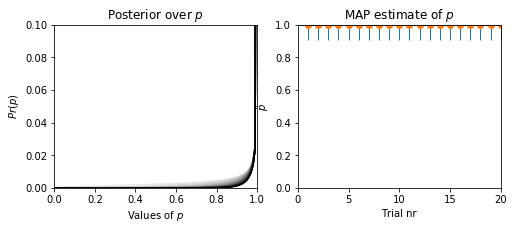

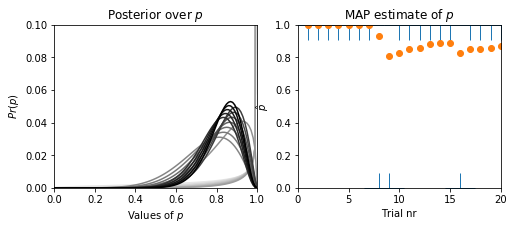

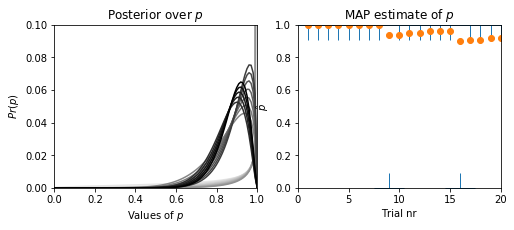

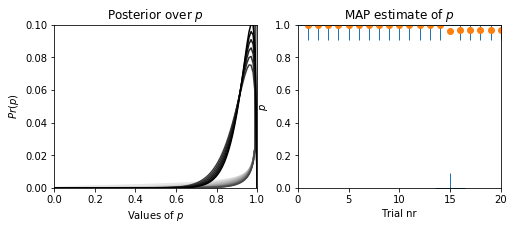

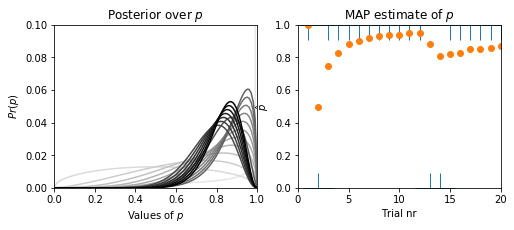

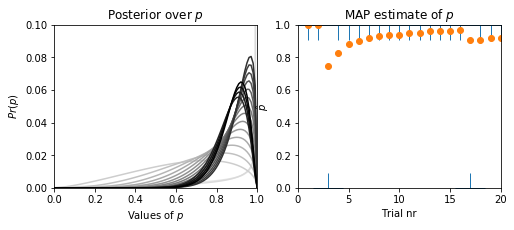

In [7]:
# Calculating the posterior of ps for each category under both conditions

training_a_p_hats = category_learning(obs_sample_a_determinstic,nr_features);
print ('Learned probability of features in category A with deterministic label:')
print (training_a_p_hats)

Learned probability of features in category B with deterministic label:
[0.         0.03030303 0.18181818 0.08080808 0.         0.08080808]


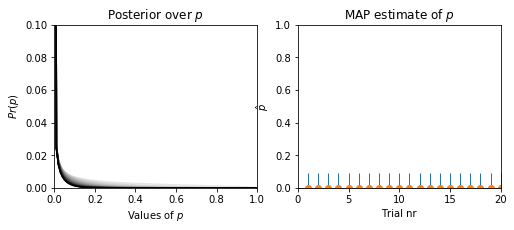

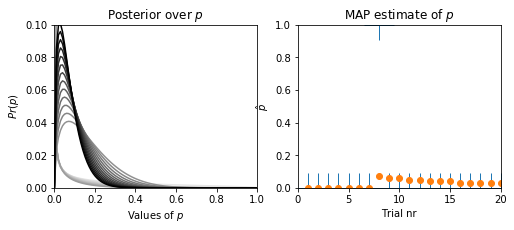

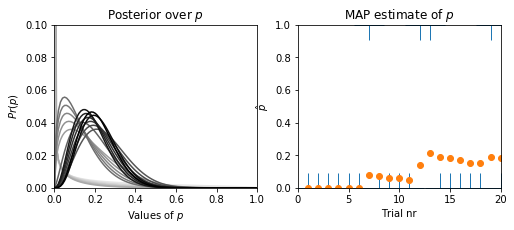

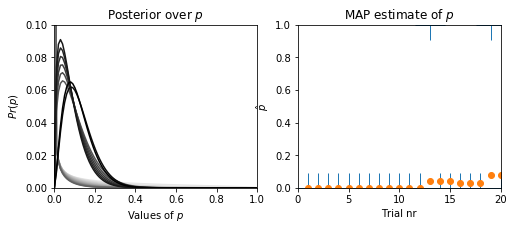

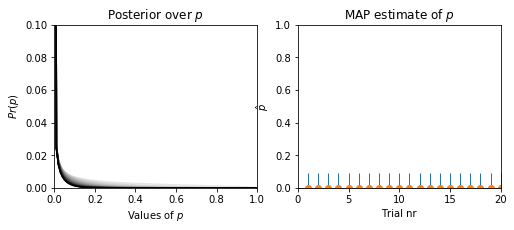

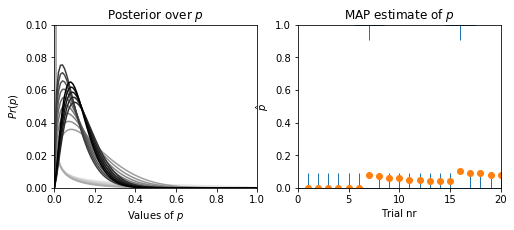

In [8]:
training_b_p_hats = category_learning(obs_sample_b_determinstic,nr_features);
print ('Learned probability of features in category B with deterministic label:')
print (training_b_p_hats)

Learned probability of features in category A with probabilistic label:
[0.76767677 0.76767677 0.96969697 0.96969697 0.86868687 0.86868687]


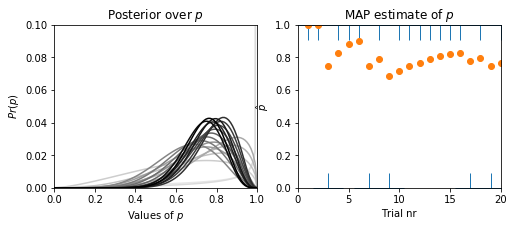

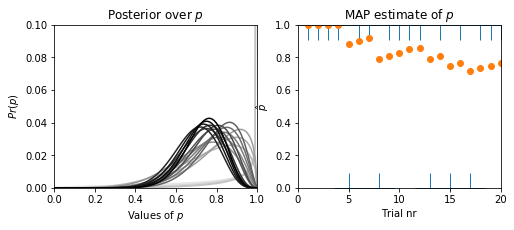

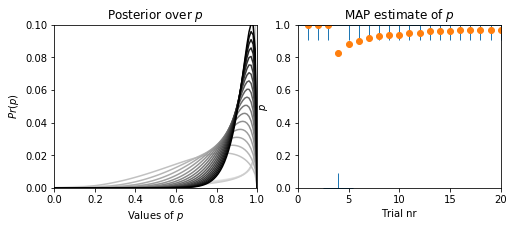

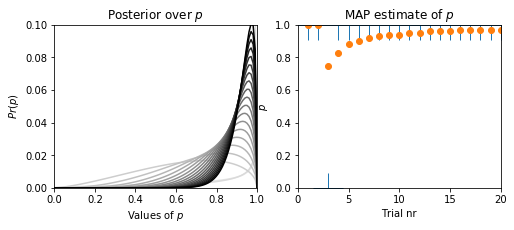

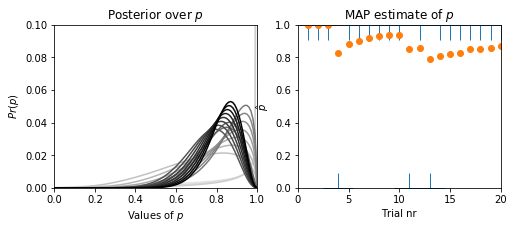

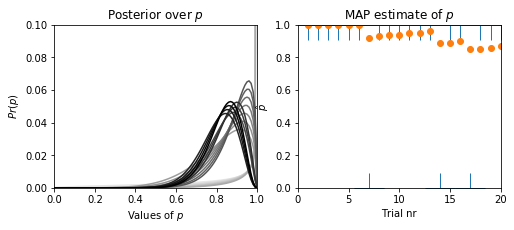

In [9]:
training_a_p_hats_pr = category_learning(obs_sample_a_probabilistic,nr_features);
print ('Learned probability of features in category A with probabilistic label:')
print (training_a_p_hats_pr)

Learned probability of features in category B with probabilistic label:
[0.03030303 0.13131313 0.         0.13131313 0.08080808 0.13131313]


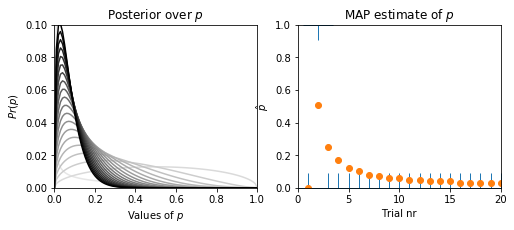

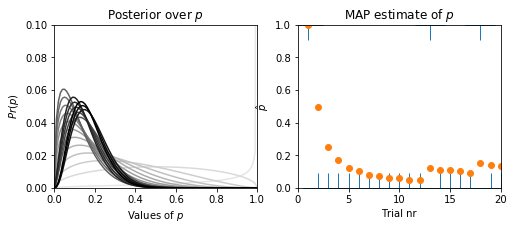

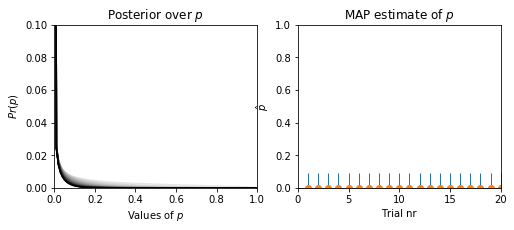

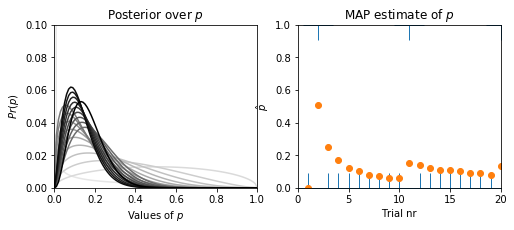

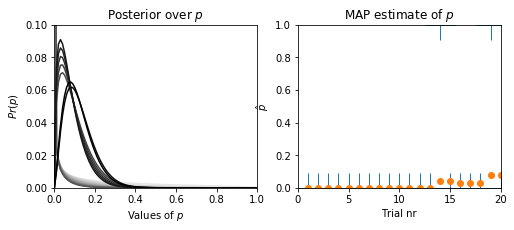

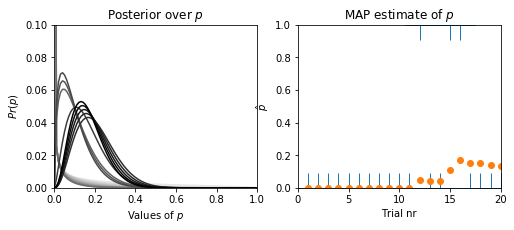

In [10]:
training_b_p_hats_pr = category_learning(obs_sample_b_probabilistic,nr_features);
print ('Learned probability of features in category B with probabilistic label:')
print (training_b_p_hats_pr)

## The Bayesian Model
4. With learned posterior probabilities, the likelihood of Category A vs. Category B can be calculated when the model encounters any testing stimuli <font color = 'blue'>*(function likelihood)* </font>
5. Classification decision can be made by comparing the likelihood of Category A vs. the likelihood of Category B <font color = 'blue'>*(function decision_LLR)* </font>
6. Classification decisions for the whole testing sample can be made <font color = 'blue'>*(function classification_LLR)* </font>

In [11]:
# Calculate the likelihood of a stimulus generated from a particular category

def likelihood(test_item,nr_features,training_p_hats):
    prob = zeros(nr_features)
    for j in range(nr_features):
        if test_item[j]==1:
            prob[j]=training_p_hats[j];
        else: 
            prob[j]=1-training_p_hats[j];
    likelihood = prod(prob);
    return likelihood

# Calculate the log likelihood ratio of the stimuli coming from Category A and coming from Category B
# Make the classification decision

def decision_LLR(test_item,nr_features,training_a_p_hats,training_b_p_hats):
    LL_a = likelihood(test_item,nr_features,training_a_p_hats);
    LL_b = likelihood(test_item,nr_features,training_b_p_hats);
    LLR = log(LL_a+1e-10)-log(LL_b+1e-10)
    if LLR>0:
        return 1;
    return 0  

# Make classification decisions for the testing sample using the rule of log likelihood ratio

def classification_LLR(test_trials,test_sample,nr_features,training_a_p_hats,training_b_p_hats):
    category_decision_LLR = zeros(test_trials);
    for i in range(test_trials):
        test_item = test_sample[i,:];
        category_decision_LLR[i] = decision_LLR(test_item,nr_features,training_a_p_hats,training_b_p_hats);
    return category_decision_LLR

## The Similarity Model
1. Calculate the prototypes for Category A and Category B <font color = 'blue'>*(function prototype)* </font>
2. Calculate the similarities between testing stimuli and the prototypes <font color = 'blue'>*(function similarity)* </font>
3. Make the classification decision based the similarities <font color = 'blue'>*(function decision_similarity)* </font>
4. For the whole testing dataset, classification decisions can be maded <font color = 'blue'>*(function classification_similarity)* </font> 

In [12]:
# Calculate the prototype for each category
# The prototype is calculated as the mean of training stimuli on each feature

def prototype(obs_sample,nr_features,nr_trials):
    prototype = zeros(nr_features);
    for j in range(nr_features):
        prototype[j] = obs_sample[:,j].sum(0)/nr_trials;
    return prototype

prototype_a_determinstic = prototype(obs_sample_a_determinstic,nr_features,nr_trials);
prototype_b_determinstic = prototype(obs_sample_b_determinstic,nr_features,nr_trials);

prototype_a_probabilistic = prototype(obs_sample_a_probabilistic,nr_features,nr_trials);
prototype_b_probabilistic = prototype(obs_sample_b_probabilistic,nr_features,nr_trials);

# Calculate the similarity between test stimulus and the category prototype

def similarity(test_item,prototype,nr_features):
    distance = sum([(test_item[j]-prototype[j])**2 for j in range(nr_features)])**0.5; # Euclidean Distance
    similarity = e**(-distance); # transform to similarity using exponential decay function
    return similarity

# Make classification decision based on the similarities

def decision_similarity(test_item,prototype_a,prototype_b,nr_features):
    similarity_a = similarity(test_item,prototype_a,nr_features);
    similarity_b = similarity(test_item,prototype_b,nr_features);
    if similarity_a > similarity_b:
        return 1;
    if similarity_a == similarity_b:
        return 0.5;
    if similarity_a < similarity_b:
        return 0;

# Classify the whole testing dataset based the rule of similarity
    
def classification_similarity(test_trials,test_sample,prototype_a,prototype_b,nr_features):
    category_decision_similarity = zeros(test_trials);
    for i in range(test_trials):
        test_item = test_sample[i,:];
        category_decision_similarity[i] = decision_similarity(test_item,prototype_a,prototype_b,nr_features);
    return category_decision_similarity

## Generate Testing Data Using the Observation Generator

In [13]:
# Generating test stimuli across all possible ps

test_sample = zeros((nr_ps,test_trials,nr_features));
for idx in range(nr_ps):
    # Here category label is treated as a regular feature
    test_sample[idx,:,:] = obs_generator(test_trials,nr_features,possible_ps[idx],possible_ps[idx]);


In [14]:
# Create a function for better visualization
# This function uses spline interpolation to plot smooth curves

def smooth_plot(x,y,color):
    import scipy.interpolate as interpolate;
    t, c, k = interpolate.splrep(x, y, s=0.5, k=4);
    N = 100;
    xmin, xmax = x.min(), x.max();
    xx = linspace(xmin, xmax, N);
    spline = interpolate.BSpline(t, c, k, extrapolate=False);
    plot(xx, spline(xx), color);
    grid();
    legend(loc='best');

## Testing The Bayesian Model
* Posteriors are learned from training data
* Testing data are fed in the classification algorithm

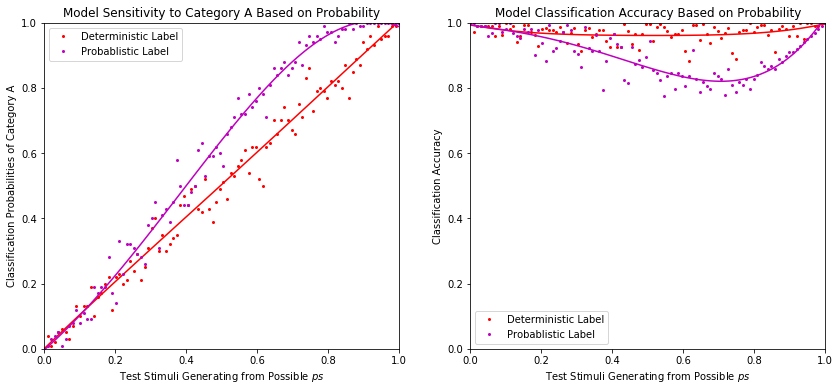

In [15]:
# This function demonstrates the classification performance of the Bayesian Model

def classification_acc_LLR(test_trials,test_sample,nr_features,training_a_p_hats,training_b_p_hats):
    classifications = zeros((nr_ps,test_trials));
    count = zeros(nr_ps);
    percent = zeros(nr_ps);
    acc = zeros(nr_ps);
    for idx in range(nr_ps):
        classifications[idx,:] = classification_LLR(test_trials,test_sample[idx,:,:],nr_features,training_a_p_hats,training_b_p_hats);
        count[idx] = classifications[idx,:].sum(0);
        percent[idx] = count[idx]/float(test_trials);
        acc[idx]= 1- abs(possible_ps[idx]-percent[idx]);
    return percent, acc 

# Model performances are computed for both deterministic labels and probabilistic labels
A_deterministic_LLR = classification_acc_LLR(test_trials,test_sample,nr_features,training_a_p_hats,training_b_p_hats);
A_probabilistic_LLR = classification_acc_LLR(test_trials,test_sample,nr_features,training_a_p_hats_pr,training_b_p_hats_pr);

# Plot model performances
fig = figure(figsize = (14,6));
subplot(1,2,1);
plot(possible_ps,A_deterministic_LLR[0],'ro',label='Deterministic Label',markersize =2);
smooth_plot(possible_ps,A_deterministic_LLR[0],'r');
plot(possible_ps,A_probabilistic_LLR[0],'mo',label='Probablistic Label',markersize =2);
smooth_plot(possible_ps,A_probabilistic_LLR[0],'m');
xlabel(r'Test Stimuli Generating from Possible $ps$');
ylabel(r'Classification Probabilities of Category A');
title(r'Model Sensitivity to Category A Based on Probability');
legend(loc='best');
axis([0,1,0,1]);

subplot(1,2,2);
plot(possible_ps,A_deterministic_LLR[1],'ro',label='Deterministic Label',markersize =2);
smooth_plot(possible_ps,A_deterministic_LLR[1],'r');
plot(possible_ps,A_probabilistic_LLR[1],'mo',label='Probablistic Label',markersize =2);
smooth_plot(possible_ps,A_probabilistic_LLR[1],'m');
xlabel(r'Test Stimuli Generating from Possible $ps$');
ylabel(r'Classification Accuracy');
title(r'Model Classification Accuracy Based on Probability');
legend(loc='best');
axis([0,1,0,1]);

## Testing The Similarity Model
* Prototyes are learned from training data
* Testing data are fed in the classification algorithm

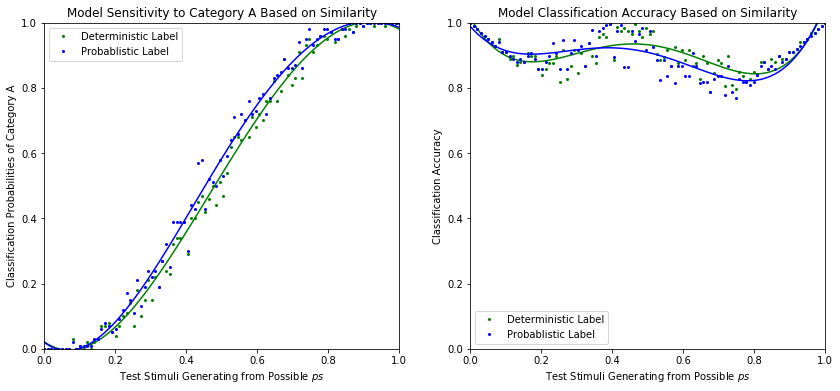

In [16]:
# This function demonstrates the classification performances of the Similarity Model

def classification_acc_similarity(test_trials,test_sample,prototype_a,prototype_b,nr_features):
    classifications = zeros((nr_ps,test_trials));
    count = zeros(nr_ps);
    percent = zeros(nr_ps);
    acc = zeros(nr_ps);
    for idx in range(nr_ps):
        classifications[idx,:] = classification_similarity(test_trials,test_sample[idx,:,:],prototype_a,prototype_b,nr_features);
        count[idx] = classifications[idx,:].sum(0);
        percent[idx] = count[idx]/float(test_trials);
        acc[idx]= 1- abs(possible_ps[idx]-percent[idx]);
    return percent, acc

# Model performances are computed for both deterministic labels and probabilistic labels
A_deterministic_similarity = classification_acc_similarity(test_trials,test_sample,prototype_a_determinstic,prototype_b_determinstic,nr_features);
A_probabilistic_similarity = classification_acc_similarity(test_trials,test_sample,prototype_a_probabilistic,prototype_b_probabilistic,nr_features);

# Plot model performances
fig = figure(figsize = (14,6));
subplot(1,2,1);
plot(possible_ps,A_deterministic_similarity[0],'go',label='Deterministic Label', markersize =2);
smooth_plot(possible_ps,A_deterministic_similarity[0],'g');
plot(possible_ps,A_probabilistic_similarity[0],'bo',label='Probablistic Label', markersize =2);
smooth_plot(possible_ps,A_probabilistic_similarity[0],'b');
xlabel(r'Test Stimuli Generating from Possible $ps$');
ylabel(r'Classification Probabilities of Category A');
title(r'Model Sensitivity to Category A Based on Similarity');
legend(loc='best');
axis([0,1,0,1]);

subplot(1,2,2);
plot(possible_ps,A_deterministic_similarity[1],'go',label='Deterministic Label', markersize =2);
smooth_plot(possible_ps,A_deterministic_similarity[1],'g');
plot(possible_ps,A_probabilistic_similarity[1],'bo',label='Probablistic Label', markersize =2);
smooth_plot(possible_ps,A_probabilistic_similarity[1],'b');
xlabel(r'Test Stimuli Generating from Possible $ps$');
ylabel(r'Classification Accuracy');
title(r'Model Classification Accuracy Based on Similarity');
legend(loc='best');
axis([0,1,0,1]);

## Visual Comparison of the Bayesian Model and the Similarity Model with Deterministic and Probabilistic Labels

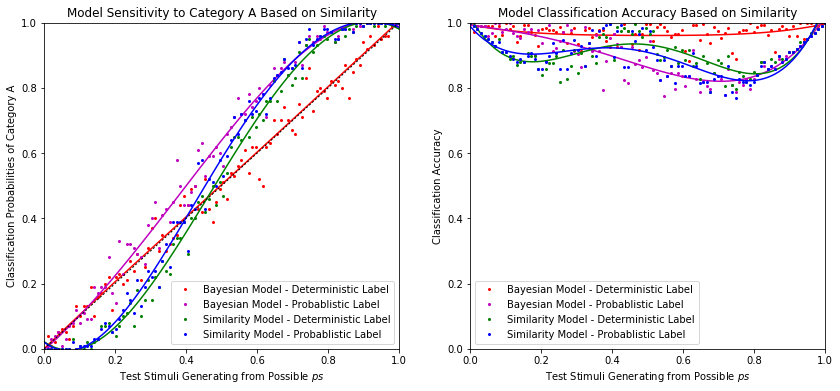

In [17]:
# For better visual comparison, plotting the performances of the two models together

fig = figure(figsize = (14,6));
subplot(1,2,1);
plot(possible_ps,A_deterministic_LLR[0],'ro',label='Bayesian Model - Deterministic Label',markersize =2);
smooth_plot(possible_ps,A_deterministic_LLR[0],'r');
plot(possible_ps,A_probabilistic_LLR[0],'mo',label='Bayesian Model - Probablistic Label',markersize =2);
smooth_plot(possible_ps,A_probabilistic_LLR[0],'m');
plot(possible_ps,A_deterministic_similarity[0],'go',label='Similarity Model - Deterministic Label', markersize =2);
smooth_plot(possible_ps,A_deterministic_similarity[0],'g');
plot(possible_ps,A_probabilistic_similarity[0],'bo',label='Similarity Model - Probablistic Label', markersize =2);
smooth_plot(possible_ps,A_probabilistic_similarity[0],'b');
plot([0,0.6,1], [0,0.6,1], 'k-', lw=1,dashes=[2, 2]);
xlabel(r'Test Stimuli Generating from Possible $ps$');
ylabel(r'Classification Probabilities of Category A');
title(r'Model Sensitivity to Category A Based on Similarity');
legend(loc='best');
axis([0,1,0,1]);

subplot(1,2,2);
plot(possible_ps,A_deterministic_LLR[1],'ro',label='Bayesian Model - Deterministic Label',markersize =2);
smooth_plot(possible_ps,A_deterministic_LLR[1],'r');
plot(possible_ps,A_probabilistic_LLR[1],'mo',label='Bayesian Model - Probablistic Label',markersize =2);
smooth_plot(possible_ps,A_probabilistic_LLR[1],'m');
plot(possible_ps,A_deterministic_similarity[1],'go',label='Similarity Model - Deterministic Label', markersize =2);
smooth_plot(possible_ps,A_deterministic_similarity[1],'g');
plot(possible_ps,A_probabilistic_similarity[1],'bo',label='Similarity Model - Probablistic Label', markersize =2);
smooth_plot(possible_ps,A_probabilistic_similarity[1],'b');
xlabel(r'Test Stimuli Generating from Possible $ps$');
ylabel(r'Classification Accuracy');
title(r'Model Classification Accuracy Based on Similarity');
legend(loc='best');
axis([0,1,0,1]);